## КОМПЬЮТЕРНАЯ СЦИНТИЛЛЯЦИОННАЯ $\gamma$-СПЕКТРОМЕТРИЯ.


In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as sps
import statsmodels.api as sm
import codecs
from scipy.optimize import curve_fit

Спектрометрических измерения - заключается в определении энергии и интенсивности дискретных гамма-линий от различных гамма-источников и их идентификации.

В настоящее время используются различные типы гамма-детекторов: полупроводниковые, сцинтилляционные,
пластиковые, жидкостные, газовые 

В данной работе исследуются сцинтилляционные гамма-спектрометры на
основе неорганического кристалла NaI(Tl).

При прохождении гамма-квантов через материальную среду образуются
электроны, возникающие за счет фотоэффекта, комптоновского рассеяния и
рождения электрон-позитронных пар. 

In [95]:
def MNK(x,y):
    m=0
    u=0
    z=0
    p=0
    for i in range(len(x)):
        m+=x[i]*y[i] 
    XY=m/len(x)
    for i in range(len(x)):
        u+=x[i]*x[i]
    X2=u/len(x)
    for i in range(len(x)):
        z+=x[i]
    X=z/len(x)
    for i in range(len(x)):
        p+=y[i]
    Y=p/len(x)  
    k=(XY-X*Y)/(X2 - X**2)
    b=Y-k*X
    pryam=[k,b]
    return(pryam)
def MNK_grex(x,y,n):
    m=0
    u=0
    z=0
    p=0
    e=0
    for i in range(len(x)):
        e+=y[i]*y[i]
    Y2=e/len(x)
    for i in range(len(x)):
        m+=x[i]*y[i] 
    XY=m/len(x)
    for i in range(len(x)):
        u+=x[i]*x[i]
    X2=u/len(x)
    for i in range(len(x)):
        z+=x[i]
    X=z/len(x)
    for i in range(len(x)):
        p+=y[i]
    Y=p/len(x)  
    k=(XY-X*Y)/(X2 - X**2)
    DXY=(XY-X*Y)
    DXX=(X2 - X**2)
    DYY=(Y2-Y**2)
    k_grex=((1/(n-2))*(DYY/DXX-k**2))**0.5
    b_grex=k_grex*(X2)**0.5
    grex=[k_grex,b_grex]
    return(grex)

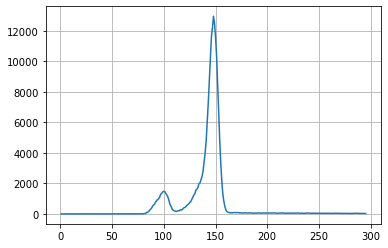

In [246]:
data1 = pd.read_excel("/Users/alekseimorozov/Desktop/secret/america.xlsx")
data1
amx=[]
amy=[]
for i in range(5,300):
    amx.append(data1["DeviceName"][i])
    amy.append(data1["Стенд N 4"][i])
plt.grid()
plt.plot(amx,amy)

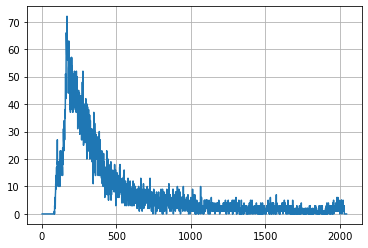

In [205]:
data0 = pd.read_excel("/Users/alekseimorozov/Desktop/secret/фон.xlsx")
data0
fonx=[]
fony=[]
for i in range(5,2052):
    fonx.append(data0["DeviceName"][i])
    fony.append(data0["Стенд N 4"][i])
plt.grid()
plt.plot(fonx,fony)

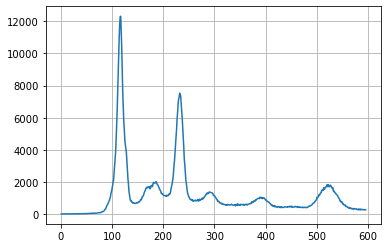

In [243]:
data2 = pd.read_excel("/Users/alekseimorozov/Desktop/secret/Единый союз протонов.xlsx")
data2
eux=[]
euy=[]
for i in range(5,600):
    eux.append(data2["DeviceName"][i])
    euy.append(data2["Стенд N 4"][i])
plt.grid()
plt.plot(eux,euy)

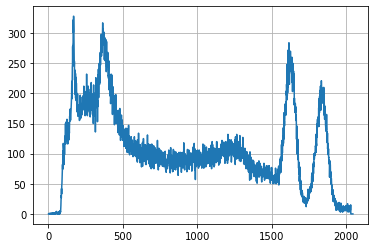

In [198]:
data3 = pd.read_excel("/Users/alekseimorozov/Desktop/secret/кобальды и катакомбы.xlsx")
data3
cox=[]
coy=[]
for i in range(5,2052):
    cox.append(data3["DeviceName"][i])
    coy.append(data3["Стенд N 4"][i])
plt.grid()
plt.plot(cox,coy)

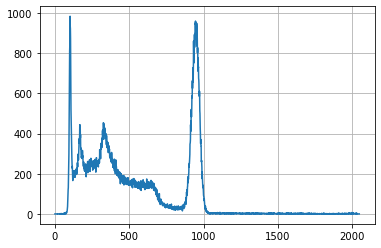

In [194]:
data4 = pd.read_excel("/Users/alekseimorozov/Desktop/secret/Салатик с сухариками.xlsx")
data4
csx=[]
csy=[]
for i in range(5,2052):
    csx.append(data4["DeviceName"][i])
    csy.append(data4["Стенд N 4"][i])
plt.grid()
plt.plot(csx,csy)

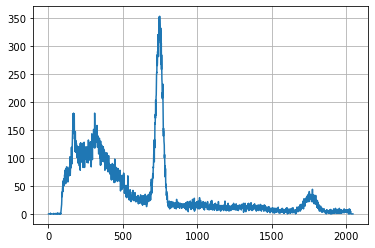

In [191]:
data5 = pd.read_excel("/Users/alekseimorozov/Desktop/secret/соли для ванн.xlsx")
data5
nax=[]
nay=[]
for i in range(5,2052):
    nax.append(data5["DeviceName"][i])
    nay.append(data5["Стенд N 4"][i])
plt.grid()
plt.plot(nax,nay)

In [132]:
k=0
m=0
for i in range(500):
    if data5["Стенд N 4"][i+500]>=m:
        m=data5["Стенд N 4"][i+500]
        k=i+500
print(k)
print(m)
k=0
m=0
for i in range(500):
    if data5["Стенд N 4"][i+1500]>=m:
        m=data5["Стенд N 4"][i+1500]
        k=i+1500
print(k)
print(m)        

752
353
1779
44


In [250]:
def gaus(x,a,b,c):
    return a*np.exp(-(x-b)**2/(2*c**2))
def gaus_pik(x,a,b,c):
    return a*np.exp(-(x-b)**2/(2*c**2))

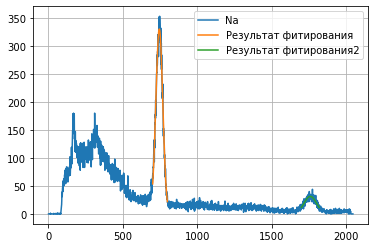

[330.10486345 745.56592891 -23.38326264]
[  31.29378958 1760.46889632   42.41197478]
330.10486345
31.29378958
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
2042    1.50
2043    1.50
2044    1.44
2045    1.44
2046    1.40
Length: 2047, dtype: float64


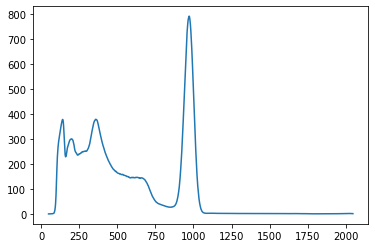

In [377]:
start, stop = 700, 800
x_fit, y_fit = nax[start:stop], nay[start:stop]
peak_guess = (start + stop)/2
popt, pcov = curve_fit(gaus, x_fit, y_fit, p0=[350, peak_guess, 200])
y_est = [gaus(x, *popt) for x in x_fit]

start1, stop1 = 1700, 1820
x_fit1, y_fit1 = nax[start1:stop1], nay[start1:stop1]
peak_guess1 = (start1 + stop1)/2
popt1, pcov1 = curve_fit(gaus, x_fit1, y_fit1, p0=[40, peak_guess1, 200])
y_est1 = [gaus(x, *popt1) for x in x_fit1]

plt.plot(nax, nay, label='Na')
plt.plot(x_fit, y_est, label='Результат фитирования')
plt.plot(x_fit1, y_est1, label='Результат фитирования2')
plt.grid()
plt.legend()
plt.show()
print(popt)
print(popt1)
print(gaus_pik(745.56592891, 330.10486345, 745.56592891, -23.38326264))
print(gaus_pik(1760.46889632,  31.29378958, 1760.46889632 ,  42.41197478))

napd=pd.Series(nay)
memna=cspd.rolling(50).mean()
print(memna)
plt.plot(memna)

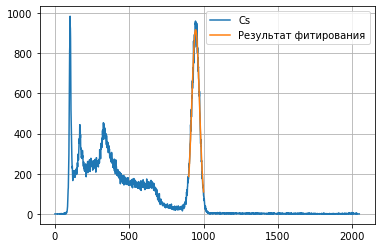

[916.4814276  946.95760751 -25.75200408]
916.4814276
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
2042    1.50
2043    1.50
2044    1.44
2045    1.44
2046    1.40
Length: 2047, dtype: float64


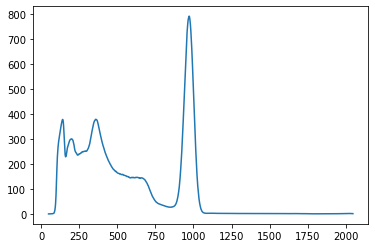

In [376]:
start, stop = 900, 1000
x_fit, y_fit = csx[start:stop], csy[start:stop]
peak_guess = (start + stop)/2
popt, pcov = curve_fit(gaus, x_fit, y_fit, p0=[350, peak_guess, 200])
y_est = [gaus(x, *popt) for x in x_fit]

plt.plot(csx, csy, label='Cs')
plt.plot(x_fit, y_est, label='Результат фитирования')
plt.grid()
plt.legend()
plt.show()
print(popt)
print(gaus_pik(946.95760751,916.4814276 , 946.95760751 ,-25.75200408))

cspd=pd.Series(csy)
memcs=cspd.rolling(50).mean()
print(memcs)
plt.plot(memcs)

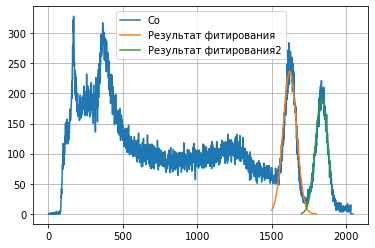

[ 236.5519473  1622.97280844   45.4214551 ]
[ 190.87041242 1836.89928737  -41.85196857]
236.5519473
190.87041242
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
2042    7.12
2043    6.92
2044    6.74
2045    6.54
2046    6.38
Length: 2047, dtype: float64


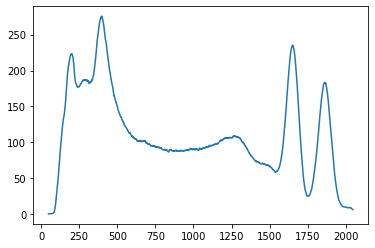

In [375]:
start, stop = 1500, 1800
x_fit, y_fit = cox[start:stop], coy[start:stop]
peak_guess = (start + stop)/2
popt, pcov = curve_fit(gaus, x_fit, y_fit, p0=[350, peak_guess, 200])
y_est = [gaus(x, *popt) for x in x_fit]

start1, stop1 = 1700, 1900
x_fit1, y_fit1 = cox[start1:stop1], coy[start1:stop1]
peak_guess1 = (start1 + stop1)/2
popt1, pcov1 = curve_fit(gaus, x_fit1, y_fit1, p0=[40, peak_guess1, 200])
y_est1 = [gaus(x, *popt1) for x in x_fit1]

plt.plot(cox, coy, label='Co')
plt.plot(x_fit, y_est, label='Результат фитирования')
plt.plot(x_fit1, y_est1, label='Результат фитирования2')
plt.grid()
plt.legend()
plt.show()
print(popt)
print(popt1)

print(gaus_pik(1622.97280844, 236.5519473 , 1622.97280844,   45.4214551))
print(gaus_pik(1836.89928737,190.87041242, 1836.89928737,  -41.85196857))
#rolling_mean = coy.rolling(window=20).mean()
#print(coypd)
coypd=pd.Series(coy)
memco=coypd.rolling(50).mean()
print(memco)
plt.plot(memco)


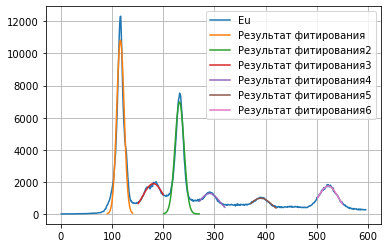

[ 1.08465571e+04  1.16407883e+02 -7.17836277e+00]
[6976.63155356  231.69739187   -8.86335804]
10846.5571
6976.63155356
109
124
226
238
0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
590    305.833333
591    302.100000
592    297.566667
593    294.866667
594    291.100000
Length: 595, dtype: float64


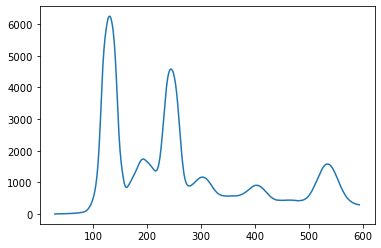

In [384]:
start, stop = 90, 140
x_fit, y_fit = eux[start:stop], euy[start:stop]
peak_guess = (start + stop)/2
popt, pcov = curve_fit(gaus, x_fit, y_fit, p0=[350, peak_guess, 200])
y_est = [gaus(x, *popt) for x in x_fit]

start1, stop1 = 200, 270
x_fit1, y_fit1 = eux[start1:stop1],euy[start1:stop1]
peak_guess1 = (start1 + stop1)/2
popt1, pcov1 = curve_fit(gaus, x_fit1, y_fit1, p0=[40, peak_guess1, 200])
y_est1 = [gaus(x, *popt1) for x in x_fit1]

start3, stop3 = 150, 200
x_fit3, y_fit3 = eux[start3:stop3],euy[start3:stop3]
peak_guess3 = (start3 + stop3)/2
popt3, pcov3 = curve_fit(gaus, x_fit3, y_fit3, p0=[800, peak_guess3, 200])
y_est3 = [gaus(x, *popt3) for x in x_fit3]

start4, stop4 = 270, 320
x_fit4, y_fit4 = eux[start4:stop4],euy[start4:stop4]
peak_guess4 = (start4 + stop4)/2
popt4, pcov4 = curve_fit(gaus, x_fit4, y_fit4, p0=[800, peak_guess4, 200])
y_est4 = [gaus(x, *popt4) for x in x_fit4]

start5, stop5 = 370, 420
x_fit5, y_fit5 = eux[start5:stop5],euy[start5:stop5]
peak_guess5 = (start5 + stop5)/2
popt5, pcov5 = curve_fit(gaus, x_fit5, y_fit5, p0=[800, peak_guess5, 200])
y_est5 = [gaus(x, *popt5) for x in x_fit5]

start6, stop6 = 500, 550
x_fit6, y_fit6 = eux[start6:stop6],euy[start6:stop6]
peak_guess6 = (start6 + stop6)/2
popt6, pcov6 = curve_fit(gaus, x_fit6, y_fit6, p0=[800, peak_guess6, 200])
y_est6 = [gaus(x, *popt6) for x in x_fit6]


plt.plot(eux, euy, label='Eu')
plt.plot(x_fit, y_est, label='Результат фитирования')
plt.plot(x_fit1, y_est1, label='Результат фитирования2')
plt.plot(x_fit3, y_est3, label='Результат фитирования3')
plt.plot(x_fit4, y_est4, label='Результат фитирования4')
plt.plot(x_fit5, y_est5, label='Результат фитирования5')
plt.plot(x_fit6, y_est6, label='Результат фитирования6')
plt.grid()
plt.legend()
plt.show()
print(popt)
print(popt1)
print(gaus_pik( 1.16407883e+02,1.08465571e+04,  1.16407883e+02, -7.17836277e+00))
print(gaus_pik(231.69739187 ,6976.63155356,  231.69739187,   -8.86335804))
for i in range (len(eux)):
    if 5200<=euy[i]<=5600:
        print(eux[i])

eupd=pd.Series(euy)
memeu=eupd.rolling(30).mean()
print(memeu)
plt.plot(memeu)

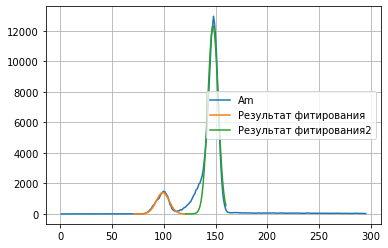

[1396.47602575   98.99630434   -6.27018587]
[1.23667042e+04 1.47543605e+02 4.97447632e+00]
1396.47602575
12366.7042
142
153
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
290    35.3
291    34.1
292    33.8
293    32.5
294    31.2
Length: 295, dtype: float64


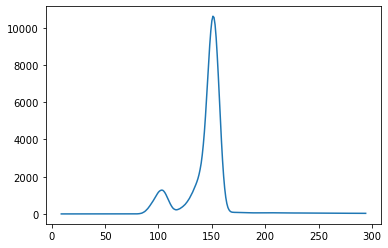

In [383]:
start, stop = 70, 120
x_fit, y_fit = amx[start:stop], amy[start:stop]
peak_guess = (start + stop)/2
popt, pcov = curve_fit(gaus, x_fit, y_fit, p0=[350, peak_guess, 200])
y_est = [gaus(x, *popt) for x in x_fit]

start1, stop1 = 120, 160
x_fit1, y_fit1 = amx[start1:stop1], amy[start1:stop1]
peak_guess1 = (start1 + stop1)/2
popt1, pcov1 = curve_fit(gaus, x_fit1, y_fit1, p0=[40, peak_guess1, 200])
y_est1 = [gaus(x, *popt1) for x in x_fit1]

plt.plot(amx, amy, label='Am')
plt.plot(x_fit, y_est, label='Результат фитирования')
plt.plot(x_fit1, y_est1, label='Результат фитирования2')
plt.grid()
plt.legend()
plt.show()
print(popt)
print(popt1)
print(gaus_pik(98.99630434,1396.47602575,98.99630434,-6.27018587))
print(gaus_pik(1.47543605e+02,1.23667042e+04, 1.47543605e+02, 4.97447632e+00))
for i in range (len(amx)):
    if 6000<=amy[i]<=7000:
        print(amx[i])
        
ampd=pd.Series(amy)
memam=ampd.rolling(10).mean()
print(memam)
plt.plot(memam)

Na 745 - 511 кэВ
Na 1760 - 1275 кэВ
Am 147 - 130 кэВ

[0.7144035564485446, 7.133922766153205]


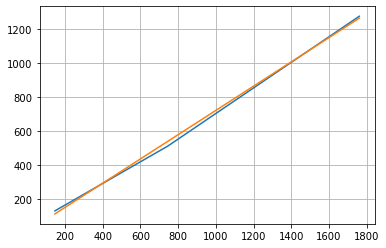

In [267]:
a=np.array([147,745,1760])
b=[130,511,1275]
E_graf=MNK(a,b)
print(E_graf)
plt.plot(a,b)
plt.grid()
plt.plot(a,a*0.714 + 7.133)

E=0,71N+7

In [313]:
E_Na1=0.71*745+7
dE_Na1=0.71*162+7
R_Na1=dE_Na1/E_Na1

E_Na2=0.71*1760+7
dE_Na2=0.71*130+7
R_Na2=dE_Na2/E_Na2

E_Cs=0.71*947+7
dE_Cs=0.71*64+7
R_Cs=dE_Cs/E_Cs

E_Am1=0.71*98+7
dE_Am1=0.71*11+7
R_Am=dE_Am1/E_Am1

E_Am2=0.71*147+7
E_Eu1=0.71*231+7
dE_Eu1=0.71*15+7
R_Eu=dE_Eu1/E_Eu1

E_Eu2=0.71*116+7

E_Co1=0.71*1622+7
dE_Co1=0.71*100+7
R_Co1=dE_Co1/E_Co1

E_Co2=0.71*1836+7
#print(E_Cs)
#print(E_Na1)
print("R_Na1=", R_Na1)
print("R_Na2=", R_Na2)
print("R_Cs=", R_Cs)
print("R_Co=", R_Co1)
print("R_Eu=", R_Eu)
print("R_Am=", R_Am)

print(E_Na2)
print(E_Am1)
print(E_Am2)
print(E_Eu1)
print(E_Eu2)
print(E_Co1)
print(E_Co2)

R_Na1= 0.22767049165034053
R_Na2= 0.0790227598281076
R_Cs= 0.07718916054579979
R_Co= 0.06732146864373134
R_Eu= 0.10321033857669142
R_Am= 0.1933925306868634
1256.6
76.58
111.36999999999999
171.01
89.36
1158.62
1310.56


[0.0008631  0.00147195 0.00584761 0.01305824]
[2.6533103187632805, 0.0005461739601261024]


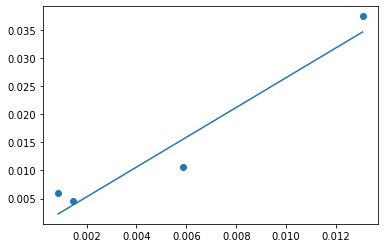

In [341]:
m=np.array([1/E_Co1,1/E_Cs,1/E_Eu1,1/E_Am1])
print(m)
k=np.array([R_Cs**2,R_Co1**2,R_Eu**2,R_Am**2])
plt.scatter(m,k)
print(MNK(m,k))
plt.plot(m,m*2.65)

[1158.62  679.37  535.95  171.01   76.58]
[0.51077473 0.51061593 0.51051325 0.50947761 0.50761282]


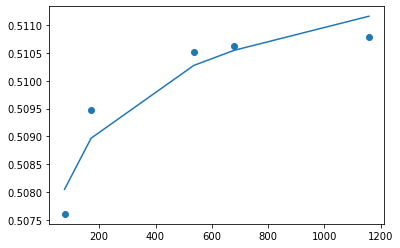

In [365]:
E1=E_Na1/(1+E_Na1/0.511)
E2=E_Co1/(1+E_Co1/0.511)
E3=E_Cs/(1+E_Cs/0.511)
E4=E_Eu1/(1+E_Eu1/0.511)
E5=E_Am1/(1+E_Am1/0.511)
m=np.array([E_Co1,E_Cs,E_Na1,E_Eu1,E_Am1])
u=np.array([E2,E3,E1,E4,E5])
print(m)
print(u)
plt.scatter(m,u)
plt.plot(m,0.50314279*(m**0.00223921))

In [363]:
def kor(x,a,b):
    return a*(x**b)
popt, pcov = curve_fit(kor, m, u)
print(popt)

[0.50314279 0.00223921]


113.5


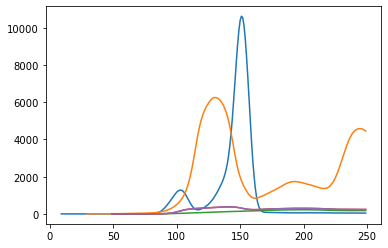

In [391]:
plt.plot(memam[0:250])
plt.plot(memeu[0:250])
plt.plot(memco[0:250])
plt.plot(memcs[0:250])
plt.plot(memna[0:250])
E_Cs=0.71*150+7
print(E_Cs)

In [1]:
def MNK(x,y):
    m=0
    u=0
    z=0
    p=0
    for i in range(len(x)):
        m+=x[i]*y[i] 
    XY=m/len(x)
    for i in range(len(x)):
        u+=x[i]*x[i]
    X2=u/len(x)
    for i in range(len(x)):
        z+=x[i]
    X=z/len(x)
    for i in range(len(x)):
        p+=y[i]
    Y=p/len(x)  
    k=(XY-X*Y)/(X2 - X**2)
    b=Y-k*X
    pryam=[k,b]
    return(pryam)
def MNK_grex(x,y,n):
    m=0
    u=0
    z=0
    p=0
    e=0
    for i in range(len(x)):
        e+=y[i]*y[i]
    Y2=e/len(x)
    for i in range(len(x)):
        m+=x[i]*y[i] 
    XY=m/len(x)
    for i in range(len(x)):
        u+=x[i]*x[i]
    X2=u/len(x)
    for i in range(len(x)):
        z+=x[i]
    X=z/len(x)
    for i in range(len(x)):
        p+=y[i]
    Y=p/len(x)  
    k=(XY-X*Y)/(X2 - X**2)
    DXY=(XY-X*Y)
    DXX=(X2 - X**2)
    DYY=(Y2-Y**2)
    k_grex=((1/(n-2))*(DYY/DXX-k**2))**0.5
    b_grex=k_grex*(X2)**0.5
    grex=[k_grex,b_grex]
    return(grex)

In [3]:
x=[1,2]
y=[1,2]
lol=MNK(x,y)
print(lol)

[1.0, 0.0]


In [8]:
m=0
for i in range(1,10000000):
    m+=(1+1/i)**i
print(m/10000000)

2.7182794145514024
